# Introduction
___

This notebook contains 4 sections and are described below:

## Data loading:
Code for loading the various datasets. Because we are working with many datasets the code is dynamic for brevity and ease of use.

## Data Exploration and Pre-Processing
Processing dataframes for our ML algorithms later. Examining possible concerns for colinearity, as well as exploring correlations between features.

## Classification Training & Hyperparameter tuning
Training various classifiers on the datasets using the features as inputs, and the overall emotions of GEMS as output. Searching algorithms are used for hyperparameter tuning for our various classifiers.

## Metrics and Scoring
Examining overall performance of the various, hyperparameter-tuned classifiers across various metrics.

# Data Loading

In [1]:
# TODO: Change models to h2o framework
import pandas as pd
import numpy as np
import os

In [2]:
# same geneva scale from playlist_generator.py
# except we added a "_" for in love, as this was added at export time
geneva_scale = {"Wonder" : ["Happy", "Dazzling", "Alluring"], "Transcendence": ["Inspiring", "Spiritual"], "Tenderness":
        ["In_love", 'Sensual'], "Nostalgia": ["Nostalgic", "Sentimental", "Dreamy"], "Peacefulness": ["Peaceful", "Calm", "Relaxing"],
    "Power" : ["Energetic", "Fiery", "Heroic"], "Joyful" : ["Joyful", "Dancing"], "Tension" : ["Agitated", "Nervous"], "Sadness" : ["Sad", "Sorrow"]
}

In [3]:
# path to directory of csvs
directory = os.listdir("../data/processed")
csvs      = [elem for elem in directory if "csv" in elem]
dfs       = []
for csv in csvs:
    print(csv)
    # create sub-emotions dfs from csvs
    vars()[f"{csv[:-4]}_df"] = pd.read_csv(f"../data/processed/{csv}", index_col=0)
    dfs.append(vars()[f"{csv[:-4]}_df"])

Tenderness.csv
Sadness.csv
Peacefulness.csv
Power.csv
Wonder.csv
Joyful.csv
complete_dataset.csv
Tension.csv
Transcendence.csv
Nostalgia.csv


In [4]:
complete_df = complete_dataset_df.iloc[:, np.r_[0:11, 16:20]] # naming change for convenience and reduction
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323011 entries, 0 to 323010
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      322538 non-null  float64
 1   energy            322538 non-null  float64
 2   key               322538 non-null  float64
 3   loudness          322538 non-null  float64
 4   mode              322538 non-null  float64
 5   speechiness       322538 non-null  float64
 6   acousticness      322538 non-null  float64
 7   instrumentalness  322538 non-null  float64
 8   liveness          322538 non-null  float64
 9   valence           322538 non-null  float64
 10  tempo             322538 non-null  float64
 11  duration_ms       322538 non-null  float64
 12  time_signature    322538 non-null  float64
 13  sub-emotion       323011 non-null  object 
 14  emotion           323011 non-null  object 
dtypes: float64(13), object(2)
memory usage: 39.4+ MB


# Data Exploration and Pre-Processing
At this point, we should have the following:

Datasets for all sub-emotions from csvs

Datasets for all 9 factors of GEMS as concatenations of their appropriate sub-emotions as per the previous section

## Our 9 factors:
Joyful

Wonder

Transcendence

Tenderness

Sadness

Power

Peacefulness

Tension

Nostalgia
## Complete Dataset

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
complete_df["sub-emotion"].value_counts()

Nervous        25870
Sorrow         19966
Joyful         19382
Inspiring      18588
Fiery          18480
Relaxing       17795
Calm           15799
Dazzling       15496
Agitated       14075
Energetic      13930
Peaceful       13810
In_love        13456
Spiritual      13257
Heroic         13227
Sentimental    12586
Dreamy         12026
Sensual        11828
Happy          11827
Nostalgic      11784
Sad            11109
Dancing        10386
Alluring        8334
Name: sub-emotion, dtype: int64

In [7]:
complete_df["emotion"].value_counts().index[::-1]

Index(['Tenderness', 'Joyful', 'Sadness', 'Transcendence', 'Wonder',
       'Nostalgia', 'Tension', 'Power', 'Peacefulness'],
      dtype='object')

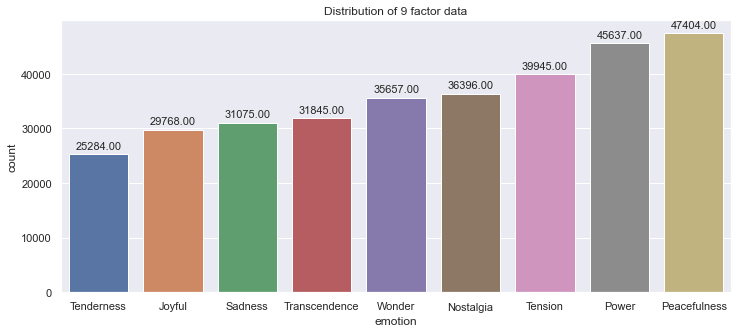

In [8]:
sns.set(rc={"figure.figsize":(12, 5)}) #width=8, height=4
g = sns.countplot(data=complete_df, x="emotion", order=complete_df["emotion"].value_counts().index[::-1])
for bar in g.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Distribution of 9 factor data")
plt.show()

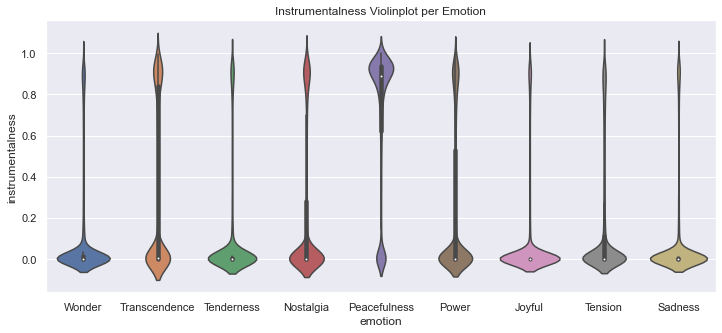

In [9]:
sns.violinplot(data=complete_df, x="emotion", y="instrumentalness")
plt.title("Instrumentalness Violinplot per Emotion")
plt.show()

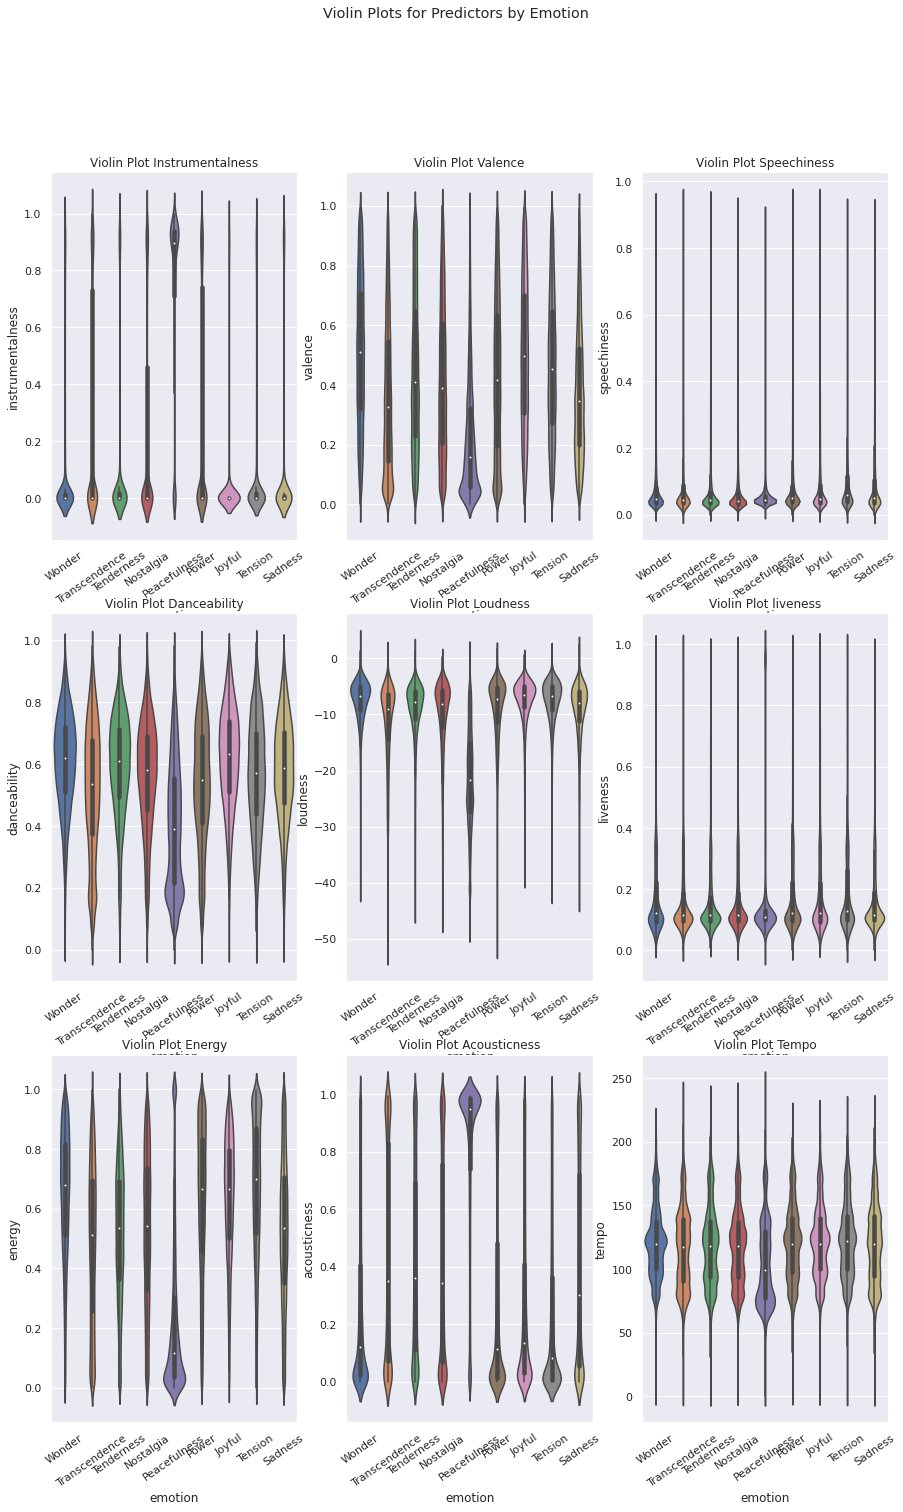

In [10]:
figure, axes = plt.subplots(3, 3, sharex=False, figsize=(15,23))
figure.suptitle('Violin Plots for Predictors by Emotion')
#figure.subplots_adjust(bottom = 0.1)

axes[1][0].set_title(f"Violin Plot Danceability")
sns.violinplot(data=complete_df, x="emotion", y="danceability", ax=axes[1,0])
axes[1][0].set_xticklabels(geneva_scale.keys(), rotation=35)

axes[2][0].set_title(f"Violin Plot Energy")
sns.violinplot(data=complete_df, x="emotion", y="energy", ax=axes[2,0])
axes[2][0].set_xticklabels(geneva_scale.keys(), rotation=35)

axes[2][1].set_title(f"Violin Plot Acousticness")
sns.violinplot(data=complete_df, x="emotion", y="acousticness", ax=axes[2,1])
axes[2][1].set_xticklabels(geneva_scale.keys(), rotation=35)

axes[1][1].set_title(f"Violin Plot Loudness")
sns.violinplot(data=complete_df, x="emotion", y="loudness", ax=axes[1,1])
axes[1][1].set_xticklabels(geneva_scale.keys(), rotation=35)

axes[0][1].set_title(f"Violin Plot Valence")
sns.violinplot(data=complete_df, x="emotion", y="valence", ax=axes[0,1])
axes[0][1].set_xticklabels(geneva_scale.keys(), rotation=35)

axes[2][2].set_title(f"Violin Plot Tempo")
sns.violinplot(data=complete_df, x="emotion", y="tempo", ax=axes[2,2])
axes[2][2].set_xticklabels(geneva_scale.keys(), rotation=35)

axes[0][0].set_title(f"Violin Plot Instrumentalness")
sns.violinplot(data=complete_df, x="emotion", y="instrumentalness", ax=axes[0,0])
axes[0][0].set_xticklabels(geneva_scale.keys(), rotation=35)

axes[0][2].set_title(f"Violin Plot Speechiness")
sns.violinplot(data=complete_df, x="emotion", y="speechiness", ax=axes[0,2])
axes[0][2].set_xticklabels(geneva_scale.keys(), rotation=35)

axes[1][2].set_title(f"Violin Plot liveness")
sns.violinplot(data=complete_df, x="emotion", y="liveness", ax=axes[1,2])
axes[1][2].set_xticklabels(geneva_scale.keys(), rotation=35)
plt.show()

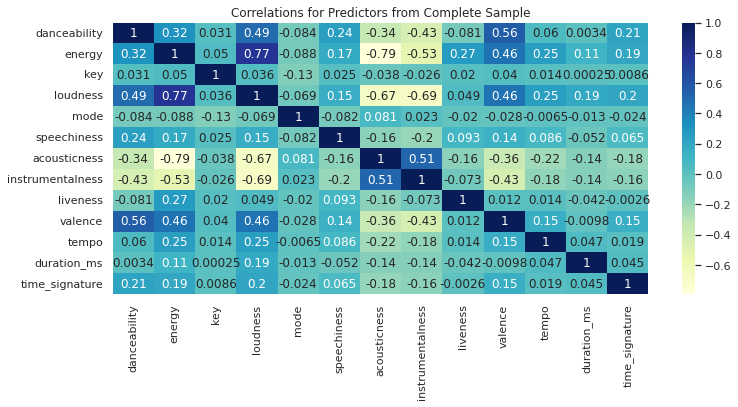

In [9]:
plt.title("Correlations for Predictors from Complete Sample")

ataplot = sns.heatmap(complete_df.corr(), cmap="YlGnBu", annot=True)

/home/diego50421/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


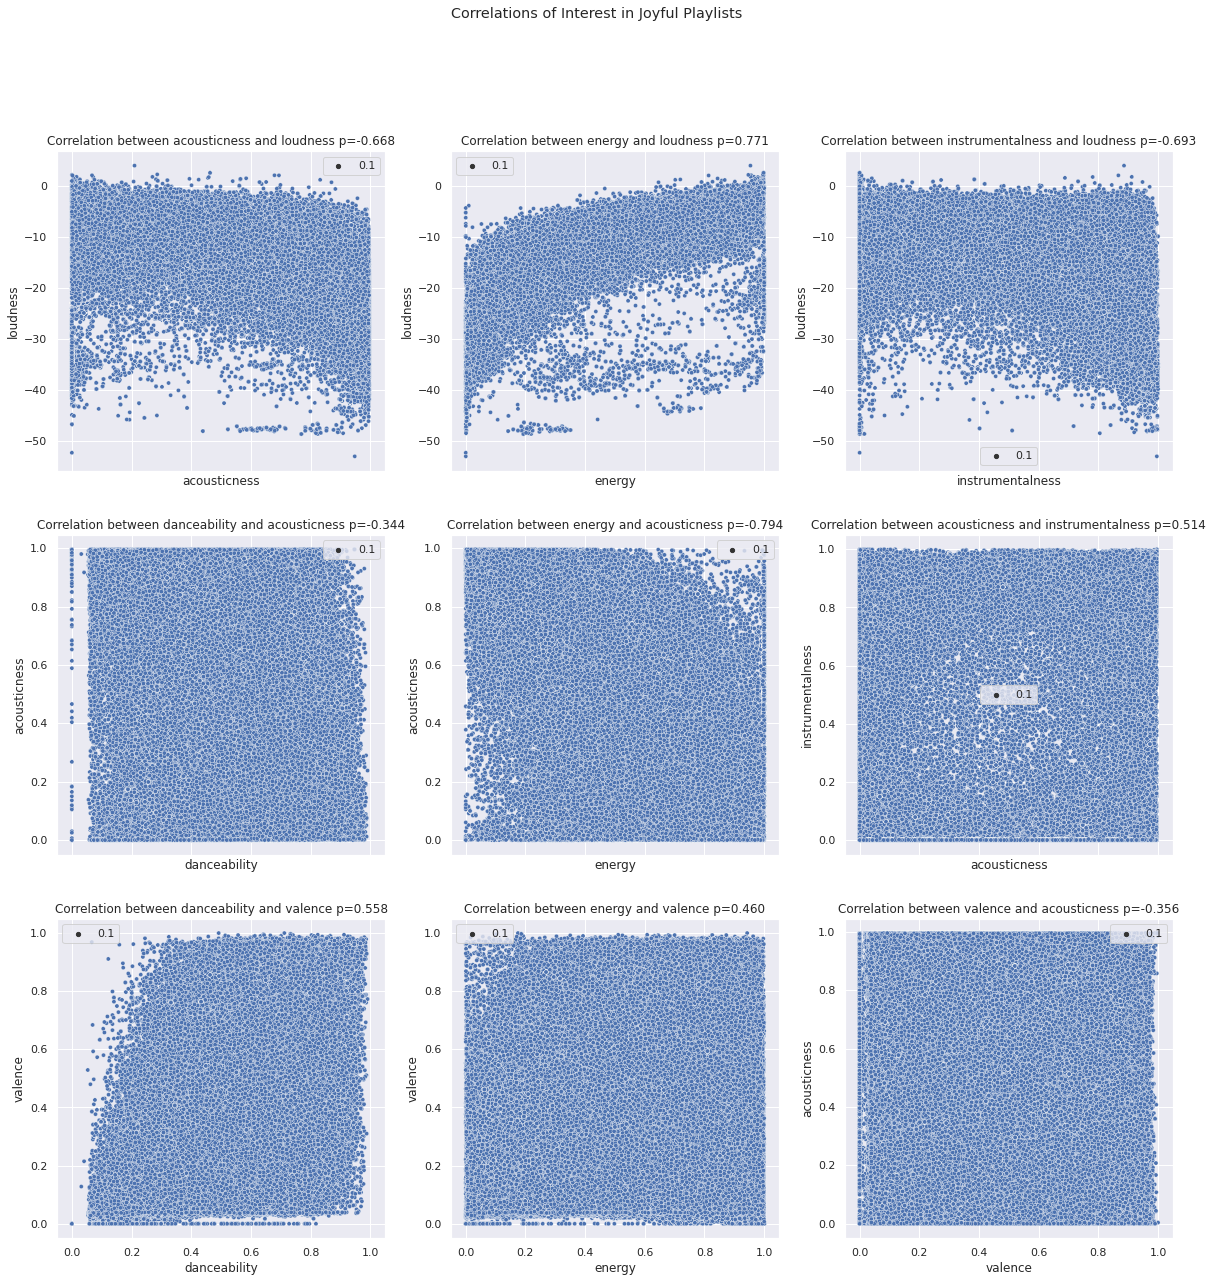

In [12]:
figure, axes = plt.subplots(3, 3, sharex=True, figsize=(20,20))
figure.suptitle('Correlations of Interest in Joyful Playlists')

p = complete_df["danceability"].corr(complete_df["acousticness"], method='pearson')
axes[1][0].set_title(f"Correlation between danceability and acousticness p={p:.3f}")
axes[1][0].set_xlabel('danceability')
sns.scatterplot(x="danceability", y="acousticness", data=complete_df, ax=axes[1][0], size=0.1)

p = complete_df["danceability"].corr(complete_df["valence"], method='pearson')
axes[2][0].set_title(f"Correlation between danceability and valence p={p:.3f}")
axes[2][0].set_xlabel('danceability')
sns.scatterplot(x="danceability", y="valence", data=complete_df, ax=axes[2][0],  size=0.1)

p = complete_df["energy"].corr(complete_df["valence"], method='pearson')
axes[2][1].set_title(f"Correlation between energy and valence p={p:.3f}")
axes[2][1].set_xlabel('energy')
sns.scatterplot(x="energy", y="valence", data=complete_df, ax=axes[2][1],  size=0.1)

p = complete_df["energy"].corr(complete_df["acousticness"], method='pearson')
axes[1][1].set_title(f"Correlation between energy and acousticness p={p:.3f}")
axes[1][1].set_xlabel('energy')
sns.scatterplot(x="energy", y="acousticness", data=complete_df, ax=axes[1][1], size=0.1)

p = complete_df["energy"].corr(complete_df["loudness"], method='pearson')
axes[0][1].set_title(f"Correlation between energy and loudness p={p:.3f}")
axes[0][1].set_xlabel('energy')
sns.scatterplot(x="energy", y="loudness", data=complete_df, ax=axes[0][1],  size=0.1)

p = complete_df["valence"].corr(complete_df["acousticness"], method='pearson')
axes[2][2].set_title(f"Correlation between valence and acousticness p={p:.3f}")
axes[2][2].set_xlabel('valence')
sns.scatterplot(x="valence", y="acousticness", data=complete_df, ax=axes[2][2], size=0.1)

p = complete_df["loudness"].corr(complete_df["acousticness"], method='pearson')
axes[0][0].set_title(f"Correlation between acousticness and loudness p={p:.3f}")
axes[0][0].set_xlabel('acousticness')
sns.scatterplot(x="acousticness", y="loudness", data=complete_df, ax=axes[0][0], size=0.1)

p = complete_df["loudness"].corr(complete_df["instrumentalness"], method='pearson')
axes[0][2].set_title(f"Correlation between instrumentalness and loudness p={p:.3f}")
axes[0][2].set_xlabel('instrumentalness')
sns.scatterplot(x="instrumentalness", y="loudness", data=complete_df, ax=axes[0][2], size=0.1)

p = complete_df["acousticness"].corr(complete_df["instrumentalness"], method='pearson')
axes[1][2].set_title(f"Correlation between acousticness and instrumentalness p={p:.3f}")
axes[1][2].set_xlabel('acousticness')
sns.scatterplot(x="acousticness", y="instrumentalness", data=complete_df, ax=axes[1][2], size=0.1)
plt.show()

## Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler
complete_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,322538.000000,322538.000000,322538.000000,322538.000000,322538.000000,322538.000000,322538.000000,322538.000000,322538.000000,322538.000000,322538.000000,3.225380e+05,322538.000000
mean,0.541377,0.536826,5.204670,-10.605353,0.638235,0.079484,0.390985,0.248254,0.179773,0.406101,118.048050,2.141792e+05,3.878058
std,0.193895,0.284357,3.557317,7.330832,0.480512,0.084308,0.367930,0.380178,0.156261,0.256920,31.134728,1.030846e+05,0.478753
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.056000e+03,0.000000
25%,0.414000,0.314000,2.000000,-13.006000,0.000000,0.036200,0.039000,0.000000,0.096500,0.189000,93.955000,1.667070e+05,4.000000
50%,0.560000,0.575000,5.000000,-8.103000,1.000000,0.047200,0.261000,0.000218,0.116000,0.377500,118.023000,2.062270e+05,4.000000
75%,0.688000,0.769000,8.000000,-5.601000,1.000000,0.079300,0.765000,0.638000,0.200000,0.599000,138.835750,2.462400e+05,4.000000
max,0.991000,1.000000,11.000000,4.037000,1.000000,0.961000,0.996000,1.000000,1.000000,1.000000,247.933000,4.688040e+06,5.000000


In [11]:
complete_df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,sub-emotion,emotion
0,0.666,0.830,0.0,-5.715,1.0,0.0751,0.01230,0.000000,0.1910,0.702,113.030,236002.0,4.0,Happy,Wonder
1,0.647,0.822,5.0,-4.662,0.0,0.1830,0.21900,0.000000,0.0908,0.962,160.019,232720.0,4.0,Happy,Wonder
2,0.621,0.820,10.0,-4.865,1.0,0.0367,0.33200,0.000000,0.1040,0.452,144.905,230192.0,4.0,Happy,Wonder
3,0.448,0.838,4.0,-5.257,0.0,0.0557,0.21000,0.000131,0.1310,0.254,139.863,208907.0,4.0,Happy,Wonder
4,0.673,0.886,1.0,-4.440,0.0,0.0431,0.18500,0.000000,0.0826,0.795,97.012,216773.0,4.0,Happy,Wonder
5,0.703,0.444,11.0,-9.331,1.0,0.0417,0.55900,0.000000,0.0973,0.712,150.960,242947.0,4.0,Happy,Wonder
6,0.512,0.662,3.0,-6.797,1.0,0.0439,0.02750,0.000000,0.1180,0.472,180.114,228347.0,4.0,Happy,Wonder
7,0.774,0.753,4.0,-5.446,0.0,0.0517,0.15200,0.000000,0.0371,0.896,119.002,219147.0,4.0,Happy,Wonder
8,0.702,0.825,6.0,-3.787,0.0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064.0,4.0,Happy,Wonder
9,0.669,0.687,0.0,-4.753,1.0,0.0430,0.15200,0.000016,0.3080,0.386,123.903,145161.0,4.0,Happy,Wonder


In [12]:
complete_df = complete_df.dropna()
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322538 entries, 0 to 323010
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      322538 non-null  float64
 1   energy            322538 non-null  float64
 2   key               322538 non-null  float64
 3   loudness          322538 non-null  float64
 4   mode              322538 non-null  float64
 5   speechiness       322538 non-null  float64
 6   acousticness      322538 non-null  float64
 7   instrumentalness  322538 non-null  float64
 8   liveness          322538 non-null  float64
 9   valence           322538 non-null  float64
 10  tempo             322538 non-null  float64
 11  duration_ms       322538 non-null  float64
 12  time_signature    322538 non-null  float64
 13  sub-emotion       322538 non-null  object 
 14  emotion           322538 non-null  object 
dtypes: float64(13), object(2)
memory usage: 39.4+ MB


In [13]:
complete_df_reducedcols = complete_df

In [14]:
scaler = StandardScaler()
scaled_complete_arr = scaler.fit_transform(complete_df.iloc[:, :13])
# fit to the numeric columns
#scaler.fit(complete_df.iloc[:, np.r_[0:11, 16:18]])
# scale the dataset and reassign columns
# keep as np array for better performance
#scaled_complete_arr = scaler.transform(complete_df.iloc[:, np.r_[0:11, 16:18]])

In [15]:
scaled_complete_df = pd.DataFrame(scaled_complete_arr, columns=complete_df.columns[:-2])
scaled_complete_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.642737,1.031008,-1.463091,0.667095,0.752875,-0.051998,-1.029233,-0.652997,0.071845,1.151720,-0.161172,0.211698,0.254708
1,0.544745,1.002874,-0.057535,0.810735,-1.328241,1.227829,-0.467441,-0.652997,-0.569390,2.163711,1.348045,0.179860,0.254708
2,0.410651,0.995840,1.348021,0.783044,0.752875,-0.507469,-0.160317,-0.652997,-0.484916,0.178651,0.862606,0.155337,0.254708
3,-0.481587,1.059141,-0.338646,0.729571,-1.328241,-0.282106,-0.491902,-0.652653,-0.312128,-0.592019,0.700664,-0.051144,0.254708
4,0.678839,1.227943,-1.181980,0.841018,-1.328241,-0.431557,-0.559850,-0.652997,-0.621867,1.513701,-0.675647,0.025162,0.254708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322533,1.725800,-0.948901,0.785798,-0.591291,0.752875,3.232378,0.350651,-0.652997,-0.139340,0.785846,0.224603,-0.871026,0.254708
322534,0.199196,0.334699,-0.057535,0.747577,-1.328241,-0.502725,-0.797667,1.451286,1.223765,1.832868,0.445547,-1.159352,0.254708
322535,0.699468,-0.586680,1.348021,0.067435,0.752875,-0.588126,1.350842,-0.284748,-0.267331,-0.510281,-1.693547,-0.807117,0.254708
322536,0.983128,-0.189291,0.223576,-0.416140,0.752875,0.599184,0.954027,0.204498,-0.465718,0.225358,0.257107,-1.017449,0.254708


In [16]:
scaled_complete_df['emotion'] = complete_df['emotion']
scaled_complete_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,emotion
0,0.642737,1.031008,-1.463091,0.667095,0.752875,-0.051998,-1.029233,-0.652997,0.071845,1.151720,-0.161172,0.211698,0.254708,Wonder
1,0.544745,1.002874,-0.057535,0.810735,-1.328241,1.227829,-0.467441,-0.652997,-0.569390,2.163711,1.348045,0.179860,0.254708,Wonder
2,0.410651,0.995840,1.348021,0.783044,0.752875,-0.507469,-0.160317,-0.652997,-0.484916,0.178651,0.862606,0.155337,0.254708,Wonder
3,-0.481587,1.059141,-0.338646,0.729571,-1.328241,-0.282106,-0.491902,-0.652653,-0.312128,-0.592019,0.700664,-0.051144,0.254708,Wonder
4,0.678839,1.227943,-1.181980,0.841018,-1.328241,-0.431557,-0.559850,-0.652997,-0.621867,1.513701,-0.675647,0.025162,0.254708,Wonder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322533,1.725800,-0.948901,0.785798,-0.591291,0.752875,3.232378,0.350651,-0.652997,-0.139340,0.785846,0.224603,-0.871026,0.254708,Sadness
322534,0.199196,0.334699,-0.057535,0.747577,-1.328241,-0.502725,-0.797667,1.451286,1.223765,1.832868,0.445547,-1.159352,0.254708,Sadness
322535,0.699468,-0.586680,1.348021,0.067435,0.752875,-0.588126,1.350842,-0.284748,-0.267331,-0.510281,-1.693547,-0.807117,0.254708,Sadness
322536,0.983128,-0.189291,0.223576,-0.416140,0.752875,0.599184,0.954027,0.204498,-0.465718,0.225358,0.257107,-1.017449,0.254708,Sadness


In [17]:
scaled_complete_df = scaled_complete_df.sample(frac=1)

In [18]:
scaled_complete_df['emotion'].value_counts()

Peacefulness     47305
Power            45527
Tension          39922
Nostalgia        36381
Wonder           35628
Transcendence    31755
Sadness          30549
Joyful           29750
Tenderness       25248
Name: emotion, dtype: int64

In [19]:
complete_df['emotion'].value_counts()

Peacefulness     47305
Power            45527
Tension          39922
Nostalgia        36381
Wonder           35628
Transcendence    31755
Sadness          31022
Joyful           29750
Tenderness       25248
Name: emotion, dtype: int64

In [20]:
scaled_complete_df.to_csv("../data/processed/complete_dataset_normalized.csv")

# Classification and Hyperparameter Tuning

In [28]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OSupportVectorMachineEstimator
from h2o.estimators import H2ONaiveBayesEstimator
from h2o.estimators import H2OGeneralizedLinearEstimator

In [29]:
h2o.init(max_mem_size=12)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_331"; Java(TM) SE Runtime Environment (build 1.8.0_331-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.331-b09, mixed mode)
  Starting server from /Users/diego/miniforge3/envs/tf/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/gx/j98lvm7j4pvds6m3w0frhncw0000gn/T/tmppfa30l_g
  JVM stdout: /var/folders/gx/j98lvm7j4pvds6m3w0frhncw0000gn/T/tmppfa30l_g/h2o_diego_started_from_python.out
  JVM stderr: /var/folders/gx/j98lvm7j4pvds6m3w0frhncw0000gn/T/tmppfa30l_g/h2o_diego_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_diego_71duv5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,10.67 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [30]:
# upload to local server and convert to h2oFrame
music_emotions = h2o.import_file(path="../data/processed/complete_dataset_normalized.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [31]:
music_emotions = music_emotions[:, 1:]
music_emotions.head(10)

danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,emotion
0.31266,0.830555,-0.619758,0.785635,-1.32824,-0.411393,-0.866159,-0.652997,-0.344126,-0.0899158,-0.675647,0.0105914,0.254708,Tenderness
1.23584,0.201064,-1.46309,0.4974,-1.32824,-0.367507,-1.0257,-0.652997,-0.113742,-1.33622,0.380507,-0.349473,0.254708,Power
-0.0947783,0.528118,0.504687,0.682646,0.752875,0.302653,-1.00423,-0.65299,0.14864,1.18675,-0.899706,0.0320205,0.254708,Joyful
0.539588,0.700437,1.62913,0.402049,0.752875,-0.473072,-0.971885,-0.652997,-0.634026,-0.49082,-0.771617,-0.052095,0.254708,Sadness
-1.5956,-1.44827,-0.0575352,-1.84299,0.752875,-0.292781,1.35628,1.69065,-0.440119,-1.22568,-1.381,-0.766286,-1.83405,Transcendence
1.49372,0.0744621,-1.18198,0.962287,0.752875,1.92764,-1.01374,-0.652997,-0.548912,-0.265068,0.768466,-0.454445,0.254708,Transcendence
0.947026,0.774288,-0.338646,0.224034,0.752875,3.1019,0.36424,-0.652997,-0.478517,1.04274,0.71743,-1.34342,0.254708,Power
-2.28721,-0.832849,0.785798,-0.747617,0.752875,-0.49205,-0.423954,1.21982,-0.56875,-1.45571,-0.961277,0.785325,0.254708,Power
0.0135281,-1.77779,-1.46309,-1.00489,-1.32824,-0.348529,1.5873,-0.652203,-0.522674,-0.751602,-0.491736,0.142444,0.254708,Peacefulness
-0.564106,0.454267,0.223576,0.219532,-1.32824,-0.584567,-0.255444,1.52231,-0.376124,-0.358483,-1.41302,-1.01405,0.254708,Power


In [32]:
train, test = music_emotions.split_frame(ratios=[0.7], seed=1)

In [33]:
len(train)

225897

In [34]:
len(test)

96641

In [35]:
# Using Random Search with a set max models for all classifiers
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 10, 'seed': 2, }
x = music_emotions.columns
y = "emotion"
x.remove(y)

# Random Forest

In [10]:
# random forest hyperparameters
clf_rf_params = {
    "ntrees" : [i for i in range(100, 375, 50)], # more trees would be tested however we see performance increase plateau at ~300 tress
    "max_depth" : [i for i in range(5, 30, 5)], 
    "nbins" : [pow(2, i) for i in range(4, 8)], # exponentially increase nbins size between 16 and 256
    "nbins_top_level" : [pow(2,i) for i in range(9, 12)], # exponentially increase nbins top level between 512 and 2048
    "stopping_metric" : ["logloss"],
    'sample_rate' : [0.32, 0.63],
    "stopping_tolerance" : [0.001], 
    "stopping_rounds" : [2],    
    "seed" : [1], 
    "histogram_type" : ['AUTO', "RoundRobin", "QuantilesGlobal"],
    "min_rows" : [i for i in range(1,11)],
    "mtries" : [-1], # use square root of number of columns as features to weak learners
}

# total fits = nfolds * num_models
rf_grid1 = H2OGridSearch(H2ORandomForestEstimator(nfolds=3, balance_classes=True, auc_type="MACRO_OVR", max_after_balance_size=1.5, keep_cross_validation_models=False, score_tree_interval=5), grid_id="rf_grid1", hyper_params=clf_rf_params, search_criteria=search_criteria)
rf_grid1.train(x=x, y=y, training_frame=train) # Standard operating procedure is 5 fold however we are limited by memory

drf Grid Build progress: |███████████████████████████████████████████████████████| 100%e) 100%
      histogram_type  max_depth  min_rows  mtries  nbins  nbins_top_level  \
0         RoundRobin       15.0       3.0    -1.0   32.0            512.0   
1    UniformAdaptive       20.0       8.0    -1.0   16.0           1024.0   
2         RoundRobin       20.0       3.0    -1.0   32.0           1024.0   
3         RoundRobin       20.0       3.0    -1.0  128.0            512.0   
4    UniformAdaptive       25.0      10.0    -1.0   64.0            512.0   
5    UniformAdaptive       15.0       8.0    -1.0   64.0           2048.0   
6    QuantilesGlobal       25.0       9.0    -1.0   16.0           2048.0   
7         RoundRobin       10.0       7.0    -1.0   32.0           1024.0   
8    UniformAdaptive       10.0       7.0    -1.0   16.0            512.0   
9    UniformAdaptive        5.0       6.0    -1.0   64.0           2048.0   

   ntrees  sample_rate  seed stopping_metric  stopping_ro

In [11]:
rf_gridperf1 = rf_grid1.get_grid(sort_by='mean_per_class_accuracy', decreasing=True)
rf_gridperf1

      histogram_type  max_depth  min_rows  mtries  nbins  nbins_top_level  \
0    QuantilesGlobal       25.0       9.0    -1.0   16.0           2048.0   
1         RoundRobin       20.0       3.0    -1.0  128.0            512.0   
2         RoundRobin       20.0       3.0    -1.0   32.0           1024.0   
3    UniformAdaptive       20.0       8.0    -1.0   16.0           1024.0   
4         RoundRobin       15.0       3.0    -1.0   32.0            512.0   
5    UniformAdaptive       25.0      10.0    -1.0   64.0            512.0   
6    UniformAdaptive       15.0       8.0    -1.0   64.0           2048.0   
7         RoundRobin       10.0       7.0    -1.0   32.0           1024.0   
8    UniformAdaptive       10.0       7.0    -1.0   16.0            512.0   
9    UniformAdaptive        5.0       6.0    -1.0   64.0           2048.0   

   ntrees  sample_rate  seed stopping_metric  stopping_rounds  \
0   113.0         0.63   3.0         logloss              0.0   
1   100.0         0.32

In [12]:
best_rf1 = rf_gridperf1.models[0]
best_rf1_perf1 = best_rf1.model_performance(test)

In [13]:
best_rf1_perf1


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.5949969601957438
RMSE: 0.7713604606121212
LogLoss: 1.7524457981175947
Mean Per-Class Error: 0.6336130148734209
AUC: 0.769319834975781
AUCPR: 0.36619149003352813

Multinomial AUC values: 


,type,first_class_domain,second_class_domain,auc
0,Joyful vs Rest,Joyful,None,0.742070
1,Nostalgia vs Rest,Nostalgia,None,0.706540
2,Peacefulness vs Rest,Peacefulness,None,0.913725
3,Power vs Rest,Power,None,0.768600
4,Sadness vs Rest,Sadness,None,0.780956
5,Tenderness vs Rest,Tenderness,None,0.780324
6,Tension vs Rest,Tension,None,0.782006
7,Transcendence vs Rest,Transcendence,None,0.725733
8,Wonder vs Rest,Wonder,None,0.723926
9,Macro OVR,None,None,0.769320



See the whole table with table.as_data_frame()

Multinomial auc_pr values: 


,type,first_class_domain,second_class_domain,auc_pr
0,Joyful vs Rest,Joyful,None,0.225865
1,Nostalgia vs Rest,Nostalgia,None,0.272660
2,Peacefulness vs Rest,Peacefulness,None,0.776007
3,Power vs Rest,Power,None,0.397134
4,Sadness vs Rest,Sadness,None,0.328971
5,Tenderness vs Rest,Tenderness,None,0.320044
6,Tension vs Rest,Tension,None,0.443972
7,Transcendence vs Rest,Transcendence,None,0.288508
8,Wonder vs Rest,Wonder,None,0.242563
9,Macro OVR,None,None,0.366191



See the whole table with table.as_data_frame()

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Joyful,Nostalgia,Peacefulness,Power,Sadness,Tenderness,Tension,Transcendence,Wonder,Error,Rate
0,1859.0,1053.0,413.0,1902.0,606.0,563.0,723.0,487.0,1413.0,0.793880,"7,160 / 9,019"
1,735.0,2881.0,1694.0,1372.0,988.0,551.0,885.0,420.0,1183.0,0.730974,"7,828 / 10,709"
2,230.0,624.0,10836.0,429.0,622.0,332.0,249.0,518.0,407.0,0.239419,"3,411 / 14,247"
3,856.0,758.0,866.0,6388.0,839.0,306.0,1723.0,612.0,1377.0,0.534572,"7,337 / 13,725"
4,349.0,939.0,624.0,1406.0,3395.0,622.0,862.0,285.0,628.0,0.627333,"5,715 / 9,110"
5,499.0,790.0,693.0,708.0,960.0,2243.0,501.0,374.0,794.0,0.703385,"5,319 / 7,562"
6,485.0,713.0,412.0,2283.0,901.0,448.0,5211.0,406.0,1124.0,0.565134,"6,772 / 11,983"
7,717.0,736.0,1764.0,1685.0,602.0,314.0,719.0,2032.0,806.0,0.783253,"7,343 / 9,375"
8,968.0,1051.0,442.0,2061.0,807.0,733.0,1271.0,459.0,2962.0,0.724568,"7,792 / 10,754"
9,6698.0,9545.0,17744.0,18234.0,9720.0,6112.0,12144.0,5593.0,10694.0,0.608153,"58,677 / 96,484"



Top-9 Hit Ratios: 


,k,hit_ratio
0,1,0.391847
1,2,0.560010
2,3,0.673334
3,4,0.759452
4,5,0.829920
5,6,0.887784
6,7,0.936269
7,8,0.974897
8,9,1.000000


In [21]:
best_rf1_perf1


ModelMetricsMultinomial: drf
** Reported on test data. **

MSE: 0.5949969601957438
RMSE: 0.7713604606121212
LogLoss: 1.7524457981175947
Mean Per-Class Error: 0.6336130148734209
AUC: 0.769319834975781
AUCPR: 0.36619149003352813

Multinomial AUC values: 


,type,first_class_domain,second_class_domain,auc
0,Joyful vs Rest,Joyful,None,0.742070
1,Nostalgia vs Rest,Nostalgia,None,0.706540
2,Peacefulness vs Rest,Peacefulness,None,0.913725
3,Power vs Rest,Power,None,0.768600
4,Sadness vs Rest,Sadness,None,0.780956
5,Tenderness vs Rest,Tenderness,None,0.780324
6,Tension vs Rest,Tension,None,0.782006
7,Transcendence vs Rest,Transcendence,None,0.725733
8,Wonder vs Rest,Wonder,None,0.723926
9,Macro OVR,None,None,0.769320



See the whole table with table.as_data_frame()

Multinomial auc_pr values: 


,type,first_class_domain,second_class_domain,auc_pr
0,Joyful vs Rest,Joyful,None,0.225865
1,Nostalgia vs Rest,Nostalgia,None,0.272660
2,Peacefulness vs Rest,Peacefulness,None,0.776007
3,Power vs Rest,Power,None,0.397134
4,Sadness vs Rest,Sadness,None,0.328971
5,Tenderness vs Rest,Tenderness,None,0.320044
6,Tension vs Rest,Tension,None,0.443972
7,Transcendence vs Rest,Transcendence,None,0.288508
8,Wonder vs Rest,Wonder,None,0.242563
9,Macro OVR,None,None,0.366191



See the whole table with table.as_data_frame()

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Joyful,Nostalgia,Peacefulness,Power,Sadness,Tenderness,Tension,Transcendence,Wonder,Error,Rate
0,1859.0,1053.0,413.0,1902.0,606.0,563.0,723.0,487.0,1413.0,0.793880,"7,160 / 9,019"
1,735.0,2881.0,1694.0,1372.0,988.0,551.0,885.0,420.0,1183.0,0.730974,"7,828 / 10,709"
2,230.0,624.0,10836.0,429.0,622.0,332.0,249.0,518.0,407.0,0.239419,"3,411 / 14,247"
3,856.0,758.0,866.0,6388.0,839.0,306.0,1723.0,612.0,1377.0,0.534572,"7,337 / 13,725"
4,349.0,939.0,624.0,1406.0,3395.0,622.0,862.0,285.0,628.0,0.627333,"5,715 / 9,110"
5,499.0,790.0,693.0,708.0,960.0,2243.0,501.0,374.0,794.0,0.703385,"5,319 / 7,562"
6,485.0,713.0,412.0,2283.0,901.0,448.0,5211.0,406.0,1124.0,0.565134,"6,772 / 11,983"
7,717.0,736.0,1764.0,1685.0,602.0,314.0,719.0,2032.0,806.0,0.783253,"7,343 / 9,375"
8,968.0,1051.0,442.0,2061.0,807.0,733.0,1271.0,459.0,2962.0,0.724568,"7,792 / 10,754"
9,6698.0,9545.0,17744.0,18234.0,9720.0,6112.0,12144.0,5593.0,10694.0,0.608153,"58,677 / 96,484"



Top-9 Hit Ratios: 


,k,hit_ratio
0,1,0.391847
1,2,0.560010
2,3,0.673334
3,4,0.759452
4,5,0.829920
5,6,0.887784
6,7,0.936269
7,8,0.974897
8,9,1.000000


In [22]:
grid_id = rf_grid1.grid_id
saved_path = h2o.save_grid("../models/", grid_id)

In [23]:
h2o.remove_all()

In [32]:
rf_grid_loaded = h2o.load_grid("../models/" + "rf_grid1")

In [37]:
rf_grid_loaded.get_grid(sort_by="accuracy")

      max_depth  min_split_improvement  mtries  nbins  nbins_top_level  \
0          35.0                    1.0    -1.0  128.0           2048.0   
1          65.0                    1.0    -1.0  256.0            512.0   
2          25.0                    1.0    -1.0   32.0            512.0   
3           5.0                    1.0    -1.0   32.0           1024.0   
4          50.0                    1.0    -1.0  256.0            256.0   
5          90.0                    1.0    -1.0  512.0           1024.0   
6          95.0                    1.0    -1.0   32.0            128.0   
7          35.0                    1.0    -1.0   32.0             32.0   
8          65.0                    1.0    -1.0   16.0            128.0   
9          40.0                    1.0    -1.0  128.0            128.0   
10         35.0                    1.0    -1.0   16.0            256.0   
11         25.0                    1.0    -1.0  128.0            128.0   
12         35.0                    1.0

# Generalized Linear Model (GLM)

In [17]:
# Grid search over different alphas
clf_glm_params = {
    "alpha" : [0, 0.25, 0.5, 0.75, 1]
}
clf_grid3 = H2OGridSearch(H2OGeneralizedLinearEstimator(family='multinomial', nfolds=3,solver='COORDINATE_DESCENT', lambda_search=True, early_stopping=False, nlambdas=100, score_each_iteration=True, auc_type='MACRO_OVR'), hyper_params=clf_glm_params, grid_id='gbm_grid1')

In [18]:
clf_grid3.train(x=x, y=y, training_frame=train)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
     alpha          model_ids   logloss
0     0.25  gbm_grid1_model_2  1.914684
1     0.75  gbm_grid1_model_4  1.914719
2     0.00  gbm_grid1_model_1  1.914767
3     0.50  gbm_grid1_model_3  1.914777
4     1.00  gbm_grid1_model_5  1.914878


/Users/diego/miniforge3/envs/tf/lib/python3.9/site-packages/h2o/grid/grid_search.py:427: UserWarning: Adding alpha array to hyperparameter runs slower with gridsearch. This is due to the fact that the algo has to run initialization for every alpha value. Setting the alpha array as a model parameter will skip the initialization and run faster overall.
  warnings.warn(w_message)


In [19]:
# export our models
grid_id = clf_grid3.grid_id
saved_path = h2o.save_grid("../models/", grid_id)

# Gradient Boosting Machine

In [42]:
# we have to worry about overfitting
clf_gbm_params = {
    "ntrees" : [i for i in range(100, 375, 50)], # more trees would be tested however we see performance increase plateau at ~300 tress
    "max_depth" : [i for i in range(3, 30, 3)], 
    "nbins" : [pow(2, i) for i in range(4, 8)], # exponentially increase nbins size between 16 and 256
    "nbins_top_level" : [pow(2,i) for i in range(6, 12)], # exponentially increase nbins top level between 512 and 2048
    "stopping_metric" : ["logloss"],
    'sample_rate' : [0.32, 0.63, 1],
    "stopping_tolerance" : [0.001], 
    "stopping_rounds" : [2],    
    "nbins_cats" : [pow(2,i) for i in range(8, 11)],
    "max_abs_leafnode_pred" : [2, 20, 200, 2000],
    "learn_rate" : [0.2, 0.05, 0.01],
    "learn_rate_annealing" : [0.99],
    "distribution" : ['multinomial'],
    "seed" : [i for i in range(1000)], 
    "histogram_type" : ['AUTO', "RoundRobin", "QuantilesGlobal"],
    "min_rows" : [i for i in range(1,11)],
}

In [ ]:
# total fits = nfolds * num_models
gbm_grid1 = H2OGridSearch(H2OGradientBoostingEstimator(nfolds=3, balance_classes=True, auc_type="MACRO_OVR", max_after_balance_size=1.5, keep_cross_validation_models=False, score_tree_interval=5), grid_id="gbm_grid1", hyper_params=clf_gbm_params, search_criteria=search_criteria, export_checkpoints_dir="../models/", recovery_dir="../recovery/")
gbm_grid1.train(x=x, y=y, training_frame=train) # Standard operating procedure is 5 fold however we are limited by memory